In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/12_Dec.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,12.500000,77.000000,1,6,1,1847.0,1849.0,1961.0,1673.0,1619.0,1562.0,1841.333333,1720.0
1,12.375000,76.916667,1,6,1,1807.0,1867.0,1931.0,1642.0,1573.0,1520.0,1821.333333,1691.0
2,12.250000,76.833333,1,6,1,1778.0,1876.0,1908.0,1626.0,1559.0,1500.0,1801.666667,1672.0
3,12.125000,76.750000,1,6,1,1754.0,1876.0,1883.0,1621.0,1546.0,1497.0,1782.166667,1649.0
4,12.000000,76.666667,2,6,1,1720.0,1847.0,1849.0,1569.0,1533.0,1487.0,1764.416667,1636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,5.842452,89.215220,23,3,1,1985.0,2067.0,2151.0,1827.0,1683.0,1801.0,2005.666667,1858.0
8924,5.842452,89.215220,24,3,1,1957.0,2055.0,2107.0,1806.0,1662.0,1781.0,1982.500000,1829.0
8925,5.842452,89.215220,24,3,1,1910.0,2052.0,2090.0,1759.0,1623.0,1748.0,1956.500000,1778.0
8926,5.500000,89.215220,24,3,1,1877.0,2024.0,2086.0,1719.0,1620.0,1735.0,1930.583333,1775.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 4992][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.337721,-0.585566,0.665774,-1.660699,0.957785,0.697146,0.141279,0.148193,0.571310,-0.535512,-0.745046,-0.962714,0.125800
1,-0.447299,-0.615791,0.660902,-1.660699,0.957785,0.697146,-0.009948,0.216267,0.457811,-0.652957,-0.919828,-1.122742,0.046314
2,-0.519092,-0.646016,0.656031,-1.660699,0.957785,0.697146,-0.119588,0.250304,0.370794,-0.713573,-0.973023,-1.198947,-0.031847
3,-0.605999,-0.676241,0.651160,-1.660699,0.957785,0.697146,-0.210325,0.250304,0.276212,-0.732516,-1.022418,-1.210377,-0.109346
4,-0.655121,-0.706466,0.646289,-1.516262,0.957785,0.697146,-0.338868,0.140629,0.147579,-0.929520,-1.071813,-1.248479,-0.179890


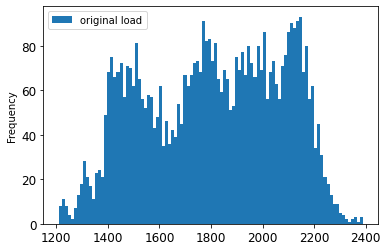

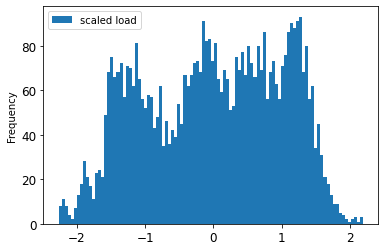

In [9]:
stlf_data[stlf_data.index <= 4992][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4992][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

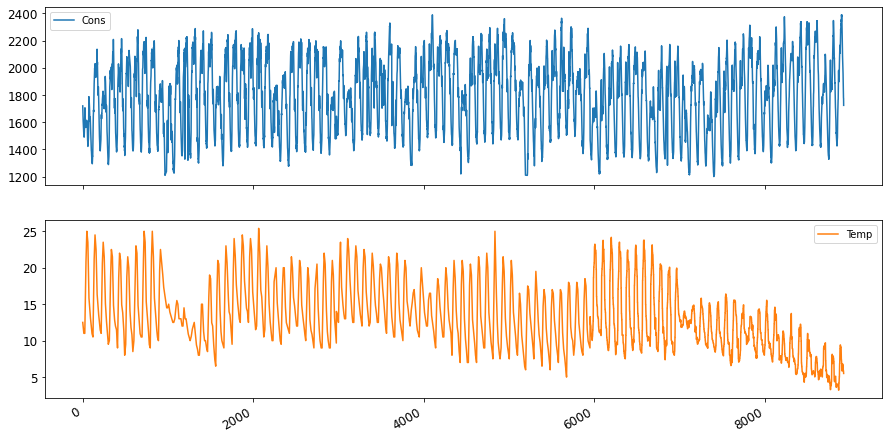

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-0.337721,-0.585566,0.665774,-1.660699,0.957785,0.697146,0.141279,0.148193,0.571310,-0.535512,-0.745046,-0.962714,0.125800,-0.447299
1,-0.447299,-0.615791,0.660902,-1.660699,0.957785,0.697146,-0.009948,0.216267,0.457811,-0.652957,-0.919828,-1.122742,0.046314,-0.519092
2,-0.519092,-0.646016,0.656031,-1.660699,0.957785,0.697146,-0.119588,0.250304,0.370794,-0.713573,-0.973023,-1.198947,-0.031847,-0.605999
3,-0.605999,-0.676241,0.651160,-1.660699,0.957785,0.697146,-0.210325,0.250304,0.276212,-0.732516,-1.022418,-1.210377,-0.109346,-0.655121
4,-0.655121,-0.706466,0.646289,-1.516262,0.957785,0.697146,-0.338868,0.140629,0.147579,-0.929520,-1.071813,-1.248479,-0.179890,-0.757142
5,-0.757142,-0.736691,0.641418,-1.516262,0.957785,0.697146,-0.448508,-0.010647,0.215678,-1.058331,-1.170603,-1.358975,-0.265337,-0.806264
6,-0.806264,-0.766916,0.636547,-1.516262,0.957785,0.697146,-0.520341,-0.120323,0.249728,-0.971194,-1.208599,-1.496143,-0.358071,-0.836492
7,-0.836492,-0.797141,0.631676,-1.516262,0.957785,0.697146,-0.607297,-0.211088,0.249728,-0.948463,-1.303590,-1.442800,-0.453454,-0.900728
8,-0.900728,-0.827365,0.626804,-1.371824,0.957785,0.697146,-0.656446,-0.339673,0.140012,-1.054542,-1.322588,-1.499953,-0.544863,-0.972521
9,-0.972521,-0.857590,0.621933,-1.371824,0.957785,0.697146,-0.758524,-0.449349,-0.011320,-1.077273,-1.341586,-1.522814,-0.629317,-1.002749


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-0.337721,-0.585566,0.665774,-1.660699,0.957785,0.697146,0.141279,0.148193,0.571310,-0.535512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.337721
1,-0.447299,-0.615791,0.660902,-1.660699,0.957785,0.697146,-0.009948,0.216267,0.457811,-0.652957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.337721,-0.447299
2,-0.519092,-0.646016,0.656031,-1.660699,0.957785,0.697146,-0.119588,0.250304,0.370794,-0.713573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.337721,-0.447299,-0.519092
3,-0.605999,-0.676241,0.651160,-1.660699,0.957785,0.697146,-0.210325,0.250304,0.276212,-0.732516,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.337721,-0.447299,-0.519092,-0.605999
4,-0.655121,-0.706466,0.646289,-1.516262,0.957785,0.697146,-0.338868,0.140629,0.147579,-0.929520,...,NaN,NaN,NaN,NaN,NaN,-0.337721,-0.447299,-0.519092,-0.605999,-0.655121
5,-0.757142,-0.736691,0.641418,-1.516262,0.957785,0.697146,-0.448508,-0.010647,0.215678,-1.058331,...,NaN,NaN,NaN,NaN,-0.337721,-0.447299,-0.519092,-0.605999,-0.655121,-0.757142
6,-0.806264,-0.766916,0.636547,-1.516262,0.957785,0.697146,-0.520341,-0.120323,0.249728,-0.971194,...,NaN,NaN,NaN,-0.337721,-0.447299,-0.519092,-0.605999,-0.655121,-0.757142,-0.806264
7,-0.836492,-0.797141,0.631676,-1.516262,0.957785,0.697146,-0.607297,-0.211088,0.249728,-0.948463,...,NaN,NaN,-0.337721,-0.447299,-0.519092,-0.605999,-0.655121,-0.757142,-0.806264,-0.836492
8,-0.900728,-0.827365,0.626804,-1.371824,0.957785,0.697146,-0.656446,-0.339673,0.140012,-1.054542,...,NaN,-0.337721,-0.447299,-0.519092,-0.605999,-0.655121,-0.757142,-0.806264,-0.836492,-0.900728
9,-0.972521,-0.857590,0.621933,-1.371824,0.957785,0.697146,-0.758524,-0.449349,-0.011320,-1.077273,...,-0.337721,-0.447299,-0.519092,-0.605999,-0.655121,-0.757142,-0.806264,-0.836492,-0.900728,-0.972521


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-1.002749,-0.887815,0.617062,-1.371824,0.957785,0.697146,-0.807673,-0.521205,-0.121037,-1.069696,...,-0.447299,-0.519092,-0.605999,-0.655121,-0.757142,-0.806264,-0.836492,-0.900728,-0.972521,-1.002749
11,-0.995192,-0.918040,0.612191,-1.371824,0.957785,0.697146,-0.837919,-0.608189,-0.211836,-1.062119,...,-0.519092,-0.605999,-0.655121,-0.757142,-0.806264,-0.836492,-0.900728,-0.972521,-1.002749,-0.995192
12,-1.066985,-0.948265,0.607320,-1.227387,0.957785,0.697146,-0.902191,-0.657354,-0.340469,-1.100005,...,-0.605999,-0.655121,-0.757142,-0.806264,-0.836492,-0.900728,-0.972521,-1.002749,-0.995192,-1.066985
13,-1.157671,-0.948265,0.607320,-1.227387,0.957785,0.697146,-0.974024,-0.759465,-0.450185,-1.190930,...,-0.655121,-0.757142,-0.806264,-0.836492,-0.900728,-0.972521,-1.002749,-0.995192,-1.066985,-1.157671
14,-1.150114,-0.948265,0.607320,-1.227387,0.957785,0.697146,-1.004269,-0.808630,-0.522068,-1.202295,...,-0.757142,-0.806264,-0.836492,-0.900728,-0.972521,-1.002749,-0.995192,-1.066985,-1.157671,-1.150114


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 10 to 4991
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  4982 non-null   float64
 1   Temp           4982 non-null   float64
 2   Hum            4982 non-null   float64
 3   A              4982 non-null   float64
 4   B              4982 non-null   float64
 5   C              4982 non-null   float64
 6   D              4982 non-null   float64
 7   E              4982 non-null   float64
 8   F              4982 non-null   float64
 9   G              4982 non-null   float64
 10  H              4982 non-null   float64
 11  I              4982 non-null   float64
 12  J              4982 non-null   float64
 13  y_t+1          4982 non-null   float64
 14  Cons_t-10      4982 non-null   float64
 15  Cons_t-9       4982 non-null   float64
 16  Cons_t-8       4982 non-null   float64
 17  Cons_t-7       4982 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
10,-0.995192
11,-1.066985
12,-1.157671
13,-1.150114
14,-1.123664
...,...
4987,-0.137457
4988,-0.197914
4989,-0.367949
4990,-0.530428


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-1.002749,-1.002749,-0.972521,-0.900728,-0.836492,-0.806264,-0.757142,-0.655121,-0.605999,-0.519092,...,-1.371824,0.957785,0.697146,-0.807673,-0.521205,-0.121037,-1.069696,-1.333987,-1.587588,-0.706816
11,-0.995192,-0.995192,-1.002749,-0.972521,-0.900728,-0.836492,-0.806264,-0.757142,-0.655121,-0.605999,...,-1.371824,0.957785,0.697146,-0.837919,-0.608189,-0.211836,-1.062119,-1.341586,-1.564727,-0.775704
12,-1.066985,-1.066985,-0.995192,-1.002749,-0.972521,-0.900728,-0.836492,-0.806264,-0.757142,-0.655121,...,-1.227387,0.957785,0.697146,-0.902191,-0.657354,-0.340469,-1.100005,-1.402380,-1.625690,-0.839624
13,-1.157671,-1.157671,-1.066985,-0.995192,-1.002749,-0.972521,-0.900728,-0.836492,-0.806264,-0.757142,...,-1.227387,0.957785,0.697146,-0.974024,-0.759465,-0.450185,-1.190930,-1.390981,-1.648551,-0.901888
14,-1.150114,-1.150114,-1.157671,-1.066985,-0.995192,-1.002749,-0.972521,-0.900728,-0.836492,-0.806264,...,-1.227387,0.957785,0.697146,-1.004269,-0.808630,-0.522068,-1.202295,-1.444176,-1.572347,-0.957197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,0.134601,0.134601,0.183722,0.202615,0.315972,0.361315,0.399100,0.327308,0.047693,0.206393,...,1.516927,0.957785,0.697146,0.360559,0.204921,0.730209,0.100964,0.136466,0.069853,0.309943
4988,-0.137457,-0.137457,0.134601,0.183722,0.202615,0.315972,0.361315,0.399100,0.327308,0.047693,...,1.661365,0.957785,0.697146,0.315191,0.046081,0.631843,-0.031635,-0.019318,-0.082556,0.242380
4989,-0.197914,-0.197914,-0.137457,0.134601,0.183722,0.202615,0.315972,0.361315,0.399100,0.327308,...,1.661365,0.957785,0.697146,0.201770,0.325942,0.397278,-0.202120,-0.197901,-0.257825,0.190052
4990,-0.367949,-0.367949,-0.197914,-0.137457,0.134601,0.183722,0.202615,0.315972,0.361315,0.399100,...,1.661365,0.957785,0.697146,0.182867,0.397799,0.336745,-0.349873,-0.410679,-0.429285,0.128119


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4982, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(4982,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=4993) & (stlf_data.index <=5952)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,1627.0,8.416667,86.000000,1.0,7.0,0.0,1757.0,1863.0,1896.0,1634.0,1597.0,1609.0,1788.500000
4994,1617.0,8.333333,86.000000,1.0,7.0,0.0,1712.0,1858.0,1915.0,1620.0,1603.0,1601.0,1763.666667
4995,1586.0,8.250000,86.000000,1.0,7.0,0.0,1669.0,1845.0,1905.0,1594.0,1567.0,1576.0,1737.083333
4996,1544.0,8.166667,86.000000,2.0,7.0,0.0,1645.0,1773.0,1893.0,1569.0,1534.0,1559.0,1708.000000
4997,1527.0,8.083333,86.000000,2.0,7.0,0.0,1627.0,1757.0,1863.0,1556.0,1514.0,1515.0,1680.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,1851.0,9.130435,73.333333,24.0,2.0,1.0,1942.0,1954.0,2078.0,1688.0,1833.0,1875.0,1944.416667
5949,1797.0,9.086957,73.250000,24.0,2.0,1.0,1935.0,1952.0,2043.0,1662.0,1794.0,1817.0,1923.916667
5950,1746.0,9.043478,73.166667,24.0,2.0,1.0,1855.0,1982.0,2017.0,1613.0,1757.0,1759.0,1901.333333
5951,1720.0,9.000000,73.083333,24.0,2.0,1.0,1849.0,1966.0,1987.0,1561.0,1736.0,1746.0,1879.083333


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,-0.720750,-1.027610,1.013615,-1.661325,1.440017,-1.0,-0.225832,0.177668,0.303815,-0.718531,-0.872393,-0.828035,-0.110724
4994,-0.758744,-1.050622,1.013615,-1.661325,1.440017,-1.0,-0.396798,0.158664,0.376076,-0.771079,-0.850532,-0.857211,-0.209265
4995,-0.876524,-1.073635,1.013615,-1.661325,1.440017,-1.0,-0.560166,0.109254,0.338044,-0.868668,-0.981693,-0.948388,-0.314750
4996,-1.036097,-1.096648,1.013615,-1.516862,1.440017,-1.0,-0.651348,-0.164401,0.292405,-0.962504,-1.101924,-1.010388,-0.430156
4997,-1.100687,-1.119661,1.013615,-1.516862,1.440017,-1.0,-0.719734,-0.225213,0.178309,-1.011299,-1.174791,-1.170859,-0.541262
4998,-0.994304,-1.142674,1.013615,-1.516862,1.440017,-1.0,-0.757727,-0.396247,0.159293,-1.011299,-1.145644,-1.086976,-0.641457
4999,-1.032298,-1.165687,1.013615,-1.516862,1.440017,-1.0,-0.875503,-0.559679,0.109851,-1.041326,-1.149288,-1.094271,-0.740659
5000,-1.093088,-1.188700,1.013615,-1.372399,1.440017,-1.0,-1.035072,-0.650897,-0.163980,-1.078860,-1.142001,-1.145330,-0.821344
5001,-1.165276,-1.211713,1.013615,-1.372399,1.440017,-1.0,-1.099659,-0.719311,-0.224831,-1.146422,-1.233085,-1.167212,-0.903020
5002,-1.256461,-1.234726,1.013615,-1.372399,1.440017,-1.0,-0.993280,-0.757319,-0.395976,-1.247765,-1.309595,-1.229212,-0.977753


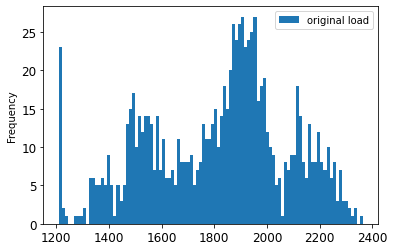

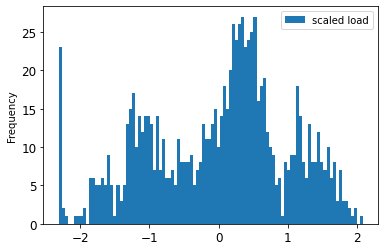

In [21]:
stlf_data[(stlf_data.index >=4993) & (stlf_data.index <=5952)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4993) & (valid.index <=5952)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4993,-0.720750,-1.027610,1.013615,-1.661325,1.440017,-1.0,-0.225832,0.177668,0.303815,-0.718531,-0.872393,-0.828035,-0.110724,-0.758744
4994,-0.758744,-1.050622,1.013615,-1.661325,1.440017,-1.0,-0.396798,0.158664,0.376076,-0.771079,-0.850532,-0.857211,-0.209265,-0.876524
4995,-0.876524,-1.073635,1.013615,-1.661325,1.440017,-1.0,-0.560166,0.109254,0.338044,-0.868668,-0.981693,-0.948388,-0.314750,-1.036097
4996,-1.036097,-1.096648,1.013615,-1.516862,1.440017,-1.0,-0.651348,-0.164401,0.292405,-0.962504,-1.101924,-1.010388,-0.430156,-1.100687
4997,-1.100687,-1.119661,1.013615,-1.516862,1.440017,-1.0,-0.719734,-0.225213,0.178309,-1.011299,-1.174791,-1.170859,-0.541262,-0.994304
4998,-0.994304,-1.142674,1.013615,-1.516862,1.440017,-1.0,-0.757727,-0.396247,0.159293,-1.011299,-1.145644,-1.086976,-0.641457,-1.032298
4999,-1.032298,-1.165687,1.013615,-1.516862,1.440017,-1.0,-0.875503,-0.559679,0.109851,-1.041326,-1.149288,-1.094271,-0.740659,-1.093088
5000,-1.093088,-1.188700,1.013615,-1.372399,1.440017,-1.0,-1.035072,-0.650897,-0.163980,-1.078860,-1.142001,-1.145330,-0.821344,-1.165276
5001,-1.165276,-1.211713,1.013615,-1.372399,1.440017,-1.0,-1.099659,-0.719311,-0.224831,-1.146422,-1.233085,-1.167212,-0.903020,-1.256461
5002,-1.256461,-1.234726,1.013615,-1.372399,1.440017,-1.0,-0.993280,-0.757319,-0.395976,-1.247765,-1.309595,-1.229212,-0.977753,-1.279257


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4993,-0.720750,-1.027610,1.013615,-1.661325,1.440017,-1.0,-0.225832,0.177668,0.303815,-0.718531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.720750
4994,-0.758744,-1.050622,1.013615,-1.661325,1.440017,-1.0,-0.396798,0.158664,0.376076,-0.771079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.720750,-0.758744
4995,-0.876524,-1.073635,1.013615,-1.661325,1.440017,-1.0,-0.560166,0.109254,0.338044,-0.868668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.720750,-0.758744,-0.876524
4996,-1.036097,-1.096648,1.013615,-1.516862,1.440017,-1.0,-0.651348,-0.164401,0.292405,-0.962504,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.720750,-0.758744,-0.876524,-1.036097
4997,-1.100687,-1.119661,1.013615,-1.516862,1.440017,-1.0,-0.719734,-0.225213,0.178309,-1.011299,...,NaN,NaN,NaN,NaN,NaN,-0.720750,-0.758744,-0.876524,-1.036097,-1.100687
4998,-0.994304,-1.142674,1.013615,-1.516862,1.440017,-1.0,-0.757727,-0.396247,0.159293,-1.011299,...,NaN,NaN,NaN,NaN,-0.720750,-0.758744,-0.876524,-1.036097,-1.100687,-0.994304
4999,-1.032298,-1.165687,1.013615,-1.516862,1.440017,-1.0,-0.875503,-0.559679,0.109851,-1.041326,...,NaN,NaN,NaN,-0.720750,-0.758744,-0.876524,-1.036097,-1.100687,-0.994304,-1.032298
5000,-1.093088,-1.188700,1.013615,-1.372399,1.440017,-1.0,-1.035072,-0.650897,-0.163980,-1.078860,...,NaN,NaN,-0.720750,-0.758744,-0.876524,-1.036097,-1.100687,-0.994304,-1.032298,-1.093088
5001,-1.165276,-1.211713,1.013615,-1.372399,1.440017,-1.0,-1.099659,-0.719311,-0.224831,-1.146422,...,NaN,-0.720750,-0.758744,-0.876524,-1.036097,-1.100687,-0.994304,-1.032298,-1.093088,-1.165276
5002,-1.256461,-1.234726,1.013615,-1.372399,1.440017,-1.0,-0.993280,-0.757319,-0.395976,-1.247765,...,-0.72075,-0.758744,-0.876524,-1.036097,-1.100687,-0.994304,-1.032298,-1.093088,-1.165276,-1.256461


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5003,-1.279257,-1.257738,1.013615,-1.372399,1.440017,-1.0,-1.031273,-0.875142,-0.559514,-1.326587,...,-0.758744,-0.876524,-1.036097,-1.100687,-0.994304,-1.032298,-1.093088,-1.165276,-1.256461,-1.279257
5004,-1.279257,-1.280751,1.013615,-1.227936,1.440017,-1.0,-1.092061,-1.034774,-0.650791,-1.319080,...,-0.876524,-1.036097,-1.100687,-0.994304,-1.032298,-1.093088,-1.165276,-1.256461,-1.279257,-1.279257
5005,-1.305852,-1.085142,0.808555,-1.227936,1.440017,-1.0,-1.164246,-1.099387,-0.719249,-1.337847,...,-1.036097,-1.100687,-0.994304,-1.032298,-1.093088,-1.165276,-1.256461,-1.279257,-1.279257,-1.305852
5006,-1.283056,-0.889532,0.603495,-1.227936,1.440017,-1.0,-1.255428,-0.992966,-0.757281,-1.307820,...,-1.100687,-0.994304,-1.032298,-1.093088,-1.165276,-1.256461,-1.279257,-1.279257,-1.305852,-1.283056
5007,-1.252661,-0.693923,0.398435,-1.227936,1.440017,-1.0,-1.278224,-1.030973,-0.875180,-1.262779,...,-0.994304,-1.032298,-1.093088,-1.165276,-1.256461,-1.279257,-1.279257,-1.305852,-1.283056,-1.252661


In [25]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
5003,-1.279257
5004,-1.305852
5005,-1.283056
5006,-1.252661
5007,-1.252661
...,...
5947,0.130308
5948,-0.074857
5949,-0.268625
5950,-0.367409


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5003,-1.279257,-1.279257,-1.256461,-1.165276,-1.093088,-1.032298,-0.994304,-1.100687,-1.036097,-0.876524,...,-1.372399,1.440017,-1.0,-1.031273,-0.875142,-0.559514,-1.326587,-1.349672,-1.276624,-1.040250
5004,-1.279257,-1.279257,-1.279257,-1.256461,-1.165276,-1.093088,-1.032298,-0.994304,-1.100687,-1.036097,...,-1.227936,1.440017,-1.0,-1.092061,-1.034774,-0.650791,-1.319080,-1.444400,-1.342271,-1.094812
5005,-1.305852,-1.305852,-1.279257,-1.279257,-1.256461,-1.165276,-1.093088,-1.032298,-0.994304,-1.100687,...,-1.227936,1.440017,-1.0,-1.164246,-1.099387,-0.719249,-1.337847,-1.327812,-1.396977,-1.145735
5006,-1.283056,-1.283056,-1.305852,-1.279257,-1.279257,-1.256461,-1.165276,-1.093088,-1.032298,-0.994304,...,-1.227936,1.440017,-1.0,-1.255428,-0.992966,-0.757281,-1.307820,-1.342386,-1.287565,-1.191369
5007,-1.252661,-1.252661,-1.283056,-1.305852,-1.279257,-1.279257,-1.256461,-1.165276,-1.093088,-1.032298,...,-1.227936,1.440017,-1.0,-1.278224,-1.030973,-0.875180,-1.262779,-1.298665,-1.298506,-1.224105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,0.122710,0.122710,0.145506,0.449455,0.476051,0.567236,0.628025,0.514044,0.521643,0.647022,...,1.516862,-0.805624,1.0,0.568211,0.648961,1.197570,-0.384475,0.198755,0.196792,0.583031
5948,0.130308,0.130308,0.122710,0.145506,0.449455,0.476051,0.567236,0.628025,0.514044,0.521643,...,1.661325,-0.805624,1.0,0.477029,0.523536,0.995999,-0.515845,-0.012560,0.142086,0.507968
5949,-0.074857,-0.074857,0.130308,0.122710,0.145506,0.449455,0.476051,0.567236,0.628025,0.514044,...,1.661325,-0.805624,1.0,0.450435,0.515935,0.862887,-0.613434,-0.154651,-0.069444,0.426622
5950,-0.268625,-0.268625,-0.074857,0.130308,0.122710,0.145506,0.449455,0.476051,0.567236,0.628025,...,1.661325,-0.805624,1.0,0.146495,0.629958,0.764004,-0.797353,-0.289455,-0.280974,0.337009


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(949, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(949,2,1,12)
print(X_valid.shape)

(949, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add((LSTM(128,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 128)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 149,889
Trainable params: 149,889
Non-trainable params: 0
__________________________________________________

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
17/17 [==============================] - 1s 54ms/step - loss: 0.2334 - val_loss: 0.0885
Epoch 2/300
17/17 [==============================] - 0s 19ms/step - loss: 0.0506 - val_loss: 0.0345
Epoch 3/300
17/17 [==============================] - 0s 22ms/step - loss: 0.0309 - val_loss: 0.0249
Epoch 4/300
17/17 [==============================] - 0s 22ms/step - loss: 0.0238 - val_loss: 0.0166
Epoch 5/300
17/17 [==============================] - 0s 22ms/step - loss: 0.0198 - val_loss: 0.0163
Epoch 6/300
17/17 [==============================] - 0s 22ms/step - loss: 0.0190 - val_loss: 0.0157
Epoch 7/300
17/17 [==============================] - 0s 22ms/step - loss: 0.0181 - val_loss: 0.0172
Epoch 8/300
17/17 [==============================] - 0s 21ms/step - loss: 0.0176 - val_loss: 0.0152
Epoch 9/300
17/17 [==============================] - 0s 23ms/step - loss: 0.0178 - val_loss: 0.0149
Epoch 10/300
17/17 [==============================] - 0s 22ms/step - loss: 0.0167 - val_loss: 0.0168

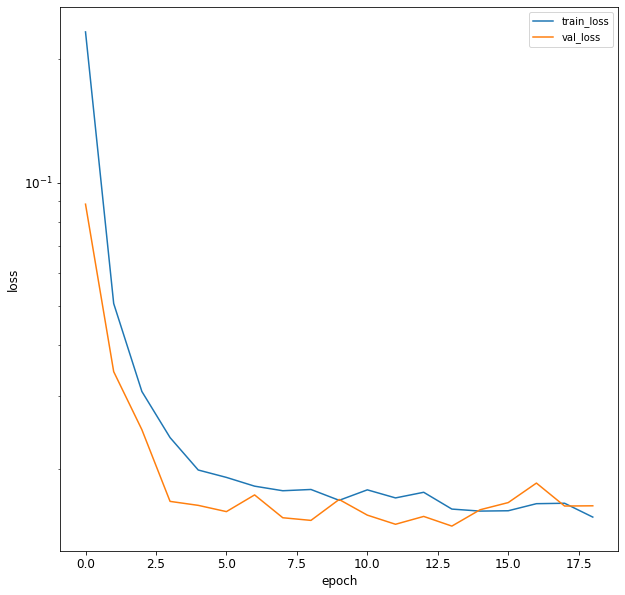

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[stlf_data.index >= 5953][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5953,1469.0,13.292452,79.551410,1.0,1.0,0.0,1545.0,1643.0,1722.0,1519.0,1524.0,1505.0,1584.166667
5954,1462.0,12.782452,81.646795,1.0,1.0,0.0,1549.0,1608.0,1699.0,1507.0,1506.0,1482.0,1564.416667
5955,1458.0,12.272452,83.742180,1.0,1.0,0.0,1529.0,1600.0,1672.0,1494.0,1469.0,1476.0,1546.583333
5956,1443.0,12.272452,83.742180,2.0,1.0,0.0,1491.0,1571.0,1634.0,1473.0,1413.0,1482.0,1530.666667
5957,1427.0,12.272452,83.742180,2.0,1.0,0.0,1469.0,1545.0,1643.0,1439.0,1437.0,1472.0,1512.666667
5958,1396.0,12.117452,84.547775,2.0,1.0,0.0,1462.0,1549.0,1608.0,1422.0,1417.0,1459.0,1495.000000
5959,1393.0,11.962452,85.353370,2.0,1.0,0.0,1458.0,1529.0,1600.0,1420.0,1391.0,1460.0,1477.750000
5960,1390.0,11.962452,85.353370,3.0,1.0,0.0,1443.0,1491.0,1571.0,1414.0,1386.0,1439.0,1462.666667
5961,1376.0,11.962452,85.353370,3.0,1.0,0.0,1427.0,1469.0,1545.0,1396.0,1359.0,1443.0,1448.583333
5962,1362.0,11.457452,87.905065,3.0,1.0,0.0,1396.0,1462.0,1549.0,1387.0,1368.0,1428.0,1433.000000


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2975 entries, 5953 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2975 non-null   float64
 1   Temp    2975 non-null   float64
 2   Hum     2975 non-null   float64
 3   A       2975 non-null   float64
 4   B       2975 non-null   float64
 5   C       2975 non-null   float64
 6   D       2975 non-null   float64
 7   E       2975 non-null   float64
 8   F       2975 non-null   float64
 9   G       2975 non-null   float64
 10  H       2975 non-null   float64
 11  I       2975 non-null   float64
 12  J       2975 non-null   float64
dtypes: float64(13)
memory usage: 325.4 KB


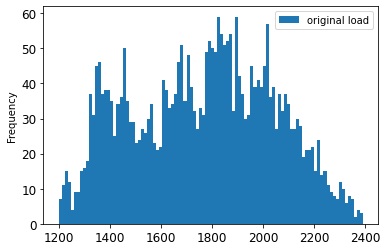

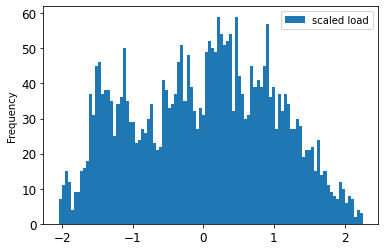

In [36]:
stlf_data[stlf_data.index >= 5953][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5953][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5953,-1.074697,0.428909,-0.123522,-1.662375,-1.399199,-1.449893,-0.798043,-0.442075,-0.154712,-0.886868,-0.868138,-0.936938,-0.683813,-1.100031
5954,-1.100031,0.315417,-0.003679,-1.662375,-1.399199,-1.449893,-0.783574,-0.568678,-0.237953,-0.930848,-0.934580,-1.021600,-0.758314,-1.114508
5955,-1.114508,0.201925,0.116163,-1.662375,-1.399199,-1.449893,-0.855922,-0.597616,-0.335672,-0.978493,-1.071156,-1.043685,-0.825585,-1.168796
5956,-1.168796,0.201925,0.116163,-1.517869,-1.399199,-1.449893,-0.993384,-0.702515,-0.473202,-1.055459,-1.277864,-1.021600,-0.885627,-1.226703
5957,-1.226703,0.201925,0.116163,-1.517869,-1.399199,-1.449893,-1.072968,-0.796563,-0.440629,-1.180069,-1.189275,-1.058409,-0.953526,-1.338898
5958,-1.338898,0.167432,0.162238,-1.517869,-1.399199,-1.449893,-1.098290,-0.782094,-0.567301,-1.242374,-1.263099,-1.106261,-1.020169,-1.349755
5959,-1.349755,0.132939,0.208313,-1.517869,-1.399199,-1.449893,-1.112759,-0.854438,-0.596255,-1.249704,-1.359071,-1.102580,-1.085240,-1.360613
5960,-1.360613,0.132939,0.208313,-1.373364,-1.399199,-1.449893,-1.167021,-0.991892,-0.701212,-1.271695,-1.377527,-1.179880,-1.142137,-1.411282
5961,-1.411282,0.132939,0.208313,-1.373364,-1.399199,-1.449893,-1.224900,-1.071471,-0.795311,-1.337665,-1.477190,-1.165156,-1.195263,-1.461950
5962,-1.461950,0.020560,0.354254,-1.373364,-1.399199,-1.449893,-1.337040,-1.096791,-0.780834,-1.370650,-1.443969,-1.220370,-1.254046,-1.458331


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5953,-1.074697,0.428909,-0.123522,-1.662375,-1.399199,-1.449893,-0.798043,-0.442075,-0.154712,-0.886868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.074697
5954,-1.100031,0.315417,-0.003679,-1.662375,-1.399199,-1.449893,-0.783574,-0.568678,-0.237953,-0.930848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.074697,-1.100031
5955,-1.114508,0.201925,0.116163,-1.662375,-1.399199,-1.449893,-0.855922,-0.597616,-0.335672,-0.978493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.074697,-1.100031,-1.114508
5956,-1.168796,0.201925,0.116163,-1.517869,-1.399199,-1.449893,-0.993384,-0.702515,-0.473202,-1.055459,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.074697,-1.100031,-1.114508,-1.168796
5957,-1.226703,0.201925,0.116163,-1.517869,-1.399199,-1.449893,-1.072968,-0.796563,-0.440629,-1.180069,...,NaN,NaN,NaN,NaN,NaN,-1.074697,-1.100031,-1.114508,-1.168796,-1.226703
5958,-1.338898,0.167432,0.162238,-1.517869,-1.399199,-1.449893,-1.098290,-0.782094,-0.567301,-1.242374,...,NaN,NaN,NaN,NaN,-1.074697,-1.100031,-1.114508,-1.168796,-1.226703,-1.338898
5959,-1.349755,0.132939,0.208313,-1.517869,-1.399199,-1.449893,-1.112759,-0.854438,-0.596255,-1.249704,...,NaN,NaN,NaN,-1.074697,-1.100031,-1.114508,-1.168796,-1.226703,-1.338898,-1.349755
5960,-1.360613,0.132939,0.208313,-1.373364,-1.399199,-1.449893,-1.167021,-0.991892,-0.701212,-1.271695,...,NaN,NaN,-1.074697,-1.100031,-1.114508,-1.168796,-1.226703,-1.338898,-1.349755,-1.360613
5961,-1.411282,0.132939,0.208313,-1.373364,-1.399199,-1.449893,-1.224900,-1.071471,-0.795311,-1.337665,...,NaN,-1.074697,-1.100031,-1.114508,-1.168796,-1.226703,-1.338898,-1.349755,-1.360613,-1.411282
5962,-1.461950,0.020560,0.354254,-1.373364,-1.399199,-1.449893,-1.337040,-1.096791,-0.780834,-1.370650,...,-1.074697,-1.100031,-1.114508,-1.168796,-1.226703,-1.338898,-1.349755,-1.360613,-1.411282,-1.461950


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5963,-1.458331,-0.091819,0.500194,-1.373364,-1.399199,-1.449893,-1.347892,-1.111260,-0.853218,-1.366985,...,-1.100031,-1.114508,-1.168796,-1.226703,-1.338898,-1.349755,-1.360613,-1.411282,-1.461950,-1.458331
5964,-1.480046,-0.091819,0.500194,-1.228858,-1.399199,-1.449893,-1.358744,-1.165519,-0.990748,-1.403635,...,-1.114508,-1.168796,-1.226703,-1.338898,-1.349755,-1.360613,-1.411282,-1.461950,-1.458331,-1.480046
5965,-1.483665,-0.091819,0.500194,-1.228858,-1.399199,-1.449893,-1.409388,-1.223394,-1.070371,-1.447615,...,-1.168796,-1.226703,-1.338898,-1.349755,-1.360613,-1.411282,-1.461950,-1.458331,-1.480046,-1.483665
5966,-1.501761,-0.116298,0.543602,-1.228858,-1.399199,-1.449893,-1.460032,-1.335528,-1.095705,-1.487930,...,-1.226703,-1.338898,-1.349755,-1.360613,-1.411282,-1.461950,-1.458331,-1.480046,-1.483665,-1.501761
5967,-1.563287,-0.140777,0.587010,-1.228858,-1.399199,-1.449893,-1.456415,-1.346379,-1.110182,-1.440285,...,-1.338898,-1.349755,-1.360613,-1.411282,-1.461950,-1.458331,-1.480046,-1.483665,-1.501761,-1.563287


In [40]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5963,-1.480046
5964,-1.483665
5965,-1.501761
5966,-1.563287
5967,-1.599479
...,...
8922,0.333167
8923,0.228210
8924,0.043632
8925,0.032774


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5963,-1.458331,-1.458331,-1.461950,-1.411282,-1.360613,-1.349755,-1.338898,-1.226703,-1.168796,-1.114508,...,-1.373364,-1.399199,-1.449893,-1.347892,-1.111260,-0.853218,-1.366985,-1.399675,-1.213008,-1.306229
5964,-1.480046,-1.480046,-1.458331,-1.461950,-1.411282,-1.360613,-1.349755,-1.338898,-1.226703,-1.168796,...,-1.228858,-1.399199,-1.449893,-1.358744,-1.165519,-0.990748,-1.403635,-1.451352,-1.253498,-1.348352
5965,-1.483665,-1.483665,-1.480046,-1.458331,-1.461950,-1.411282,-1.360613,-1.349755,-1.338898,-1.226703,...,-1.228858,-1.399199,-1.449893,-1.409388,-1.223394,-1.070371,-1.447615,-1.488264,-1.301350,-1.383873
5966,-1.501761,-1.501761,-1.483665,-1.480046,-1.458331,-1.461950,-1.411282,-1.360613,-1.349755,-1.338898,...,-1.228858,-1.399199,-1.449893,-1.460032,-1.335528,-1.095705,-1.487930,-1.591618,-1.308712,-1.418766
5967,-1.563287,-1.563287,-1.501761,-1.483665,-1.480046,-1.458331,-1.461950,-1.411282,-1.360613,-1.349755,...,-1.228858,-1.399199,-1.449893,-1.456415,-1.346379,-1.110182,-1.440285,-1.573162,-1.275584,-1.457746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,0.401931,0.401931,0.521364,0.691466,0.792803,0.933952,1.035289,1.046146,1.089577,1.158341,...,1.516752,-0.402404,0.689706,0.934703,1.160351,1.553553,0.344577,-0.166806,0.281450,0.998281
8923,0.333167,0.333167,0.401931,0.521364,0.691466,0.792803,0.933952,1.035289,1.046146,1.089577,...,1.516752,-0.402404,0.689706,0.793623,1.091624,1.397928,0.241957,-0.281233,0.152618,0.906176
8924,0.228210,0.228210,0.333167,0.401931,0.521364,0.691466,0.792803,0.933952,1.035289,1.046146,...,1.661258,-0.402404,0.689706,0.692336,1.048217,1.238683,0.164992,-0.358749,0.078999,0.818786
8925,0.043632,0.043632,0.228210,0.333167,0.401931,0.521364,0.691466,0.792803,0.933952,1.035289,...,1.661258,-0.402404,0.689706,0.522317,1.037366,1.177156,-0.007264,-0.502707,-0.042472,0.720709


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2964, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2964, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2964,2,1,12)

In [45]:
predictions = model.predict(X_test)
predictions

array([[-1.4032955 ],
       [-1.4128282 ],
       [-1.4135661 ],
       ...,
       [ 0.16842964],
       [-0.03100012],
       [-0.01008003]], dtype=float32)

In [46]:
feature=stlf_data.copy()[stlf_data.index >= 5953][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1765.94437
dtype: float64
Cons    276.351613
dtype: float64


In [47]:
load_mean=1765.94437
load_std=276.351613
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+1
5963,1356.931253
5964,1355.931085
5965,1350.930245
5966,1333.927387
5967,1323.925706
...,...
8922,1858.015476
8923,1829.010600
8924,1778.002027
8925,1775.001523


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[1378.1414],
       [1375.507 ],
       [1375.303 ],
       ...,
       [1812.4901],
       [1757.3774],
       [1763.1587]], dtype=float32)

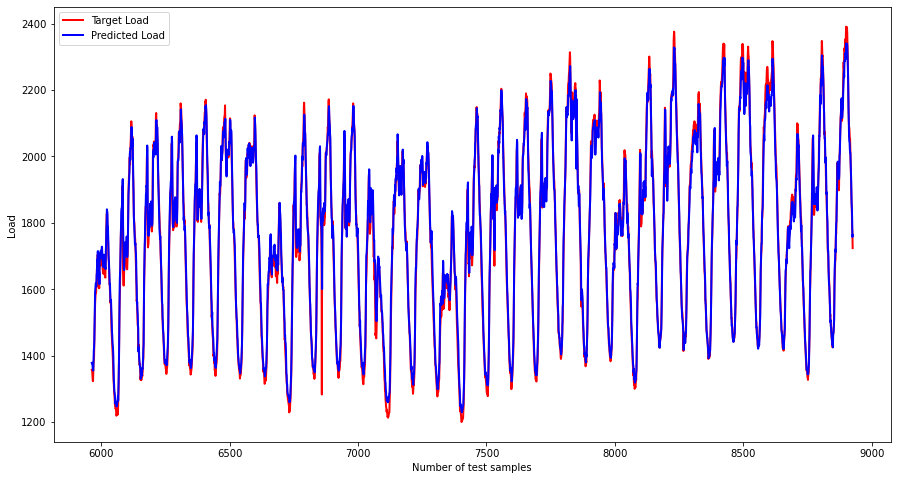

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.2877720068068736


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1   -0.365712
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5963  135591.562237
5964  135491.664797
5965  134991.220321
5966  133289.873580
5967  132289.887617
...             ...
8922  185701.576062
8923  182800.179465
8924  177698.262980
8925  177401.145163
8926  172297.023101

[2964 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5963   449.868517
5964   383.214797
5965   594.030156
5966  1460.643434
5967  1261.694497
...           ...
8922     0.280514
8923   259.398554
8924  1189.428035
8925   310.608237
8926  1533.955374

[2964 rows x 1 columns]
y_t+1    962.873216
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    31.030198
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,2964):
    b=a[i]
    print(b)

[1378.1414]
[1375.507]
[1375.303]
[1372.1458]
[1359.446]
[1354.9836]
[1355.3313]
[1386.6133]
[1414.3372]
[1425.0757]
[1446.3557]
[1498.0541]
[1562.0769]
[1591.2008]
[1602.5222]
[1610.5391]
[1618.4677]
[1608.8397]
[1608.7375]
[1643.0417]
[1647.9082]
[1688.6052]
[1686.6348]
[1712.8312]
[1715.0774]
[1705.3835]
[1663.8667]
[1634.8488]
[1622.2777]
[1650.2773]
[1615.1091]
[1697.5951]
[1708.2272]
[1706.8439]
[1693.5005]
[1716.3267]
[1699.3934]
[1713.1193]
[1707.8812]
[1727.2871]
[1728.3828]
[1708.0035]
[1686.8384]
[1686.5585]
[1677.4833]
[1666.9424]
[1669.2764]
[1704.2908]
[1693.476]
[1684.1581]
[1687.8225]
[1668.5643]
[1667.5859]
[1664.5211]
[1660.7834]
[1718.285]
[1742.444]
[1782.4127]
[1799.6024]
[1840.7827]
[1836.1787]
[1830.328]
[1793.2936]
[1790.18]
[1761.3767]
[1728.3457]
[1689.2244]
[1683.217]
[1658.875]
[1634.428]
[1613.0192]
[1615.5657]
[1590.103]
[1563.5365]
[1561.6345]
[1567.5369]
[1541.4055]
[1510.4229]
[1485.9105]
[1470.2698]
[1458.1855]
[1437.7754]
[1429.6165]
[1417.7892]
[1398

[1748.3964]
[1713.522]
[1728.5785]
[1730.6666]
[1732.6377]
[1815.1436]
[1896.0093]
[1892.2029]
[1913.9445]
[1926.4419]
[1968.334]
[2000.2998]
[1989.1501]
[2041.1012]
[2040.5323]
[2031.5529]
[2042.6768]
[2080.0913]
[2125.647]
[2125.7793]
[2105.4307]
[2068.1543]
[2071.0664]
[2050.0015]
[1996.4298]
[1971.8944]
[1928.0304]
[1888.01]
[1865.3595]
[1816.1125]
[1817.5211]
[1790.2701]
[1777.3776]
[1771.6162]
[1764.9836]
[1750.5409]
[1725.1581]
[1696.7921]
[1668.6694]
[1614.8889]
[1596.9702]
[1563.2676]
[1553.4629]
[1521.4723]
[1502.3241]
[1461.1124]
[1449.6964]
[1437.8206]
[1428.9265]
[1393.0635]
[1386.7329]
[1383.137]
[1366.7065]
[1366.9307]
[1368.9404]
[1363.9141]
[1357.1335]
[1362.3564]
[1358.6346]
[1349.6704]
[1358.9819]
[1373.1477]
[1391.846]
[1417.8588]
[1450.6715]
[1465.8813]
[1536.144]
[1600.9978]
[1676.5736]
[1748.1674]
[1773.0725]
[1814.9221]
[1850.8053]
[1868.0055]
[1892.8724]
[1896.4392]
[1919.2968]
[1932.3508]
[1997.1274]
[2024.618]
[2030.7534]
[1906.9097]
[1822.8872]
[1814.9354]
[

[1862.2078]
[1887.5806]
[1872.4215]
[1917.8392]
[1965.334]
[2004.0564]
[2001.6562]
[1918.2366]
[1836.0774]
[1811.1531]
[1816.8514]
[1824.763]
[1811.172]
[1729.4293]
[1717.565]
[1905.6299]
[1884.2058]
[1893.8137]
[1884.8046]
[1861.6105]
[1907.15]
[1913.1918]
[1910.2686]
[1860.7799]
[1880.2644]
[1878.722]
[1888.3583]
[1944.8379]
[2020.6824]
[2010.773]
[2060.8933]
[2044.8298]
[2040.147]
[2086.369]
[2082.2969]
[2101.0205]
[2123.5217]
[2140.2664]
[2134.645]
[2168.6658]
[2199.3499]
[2190.81]
[2177.0593]
[2151.978]
[2129.3635]
[2099.076]
[2087.5442]
[2018.711]
[1984.2015]
[1951.0552]
[1910.6268]
[1887.108]
[1876.7822]
[1849.8098]
[1827.1211]
[1836.2087]
[1816.1428]
[1788.8243]
[1754.0549]
[1714.0665]
[1699.211]
[1649.7375]
[1629.067]
[1593.4786]
[1579.5111]
[1554.4573]
[1523.0803]
[1495.0161]
[1470.3451]
[1454.979]
[1442.7059]
[1408.9961]
[1390.1792]
[1378.4934]
[1371.9276]
[1354.8877]
[1359.5078]
[1363.1931]
[1350.8046]
[1344.3114]
[1322.6569]
[1327.6584]
[1346.288]
[1359.2358]
[1372.1328]
[

[1977.4216]
[1989.9171]
[2017.3871]
[2038.4564]
[2082.6895]
[2175.2925]
[2167.1729]
[2176.2375]
[2187.6045]
[2195.6978]
[2193.12]
[2186.6084]
[2201.9478]
[2185.414]
[2206.0918]
[2244.76]
[2328.4043]
[2320.178]
[2327.3567]
[2307.2217]
[2272.176]
[2279.7686]
[2251.5095]
[2208.0754]
[2168.3328]
[2143.7456]
[2100.7334]
[2076.2493]
[2051.6978]
[2017.2812]
[2002.9597]
[1980.6603]
[1982.4493]
[1946.9335]
[1902.7488]
[1874.8396]
[1850.86]
[1823.1808]
[1774.4779]
[1753.0782]
[1722.8586]
[1710.1449]
[1653.9365]
[1643.9514]
[1609.6697]
[1586.4172]
[1554.4602]
[1531.895]
[1514.8248]
[1510.8927]
[1505.4314]
[1494.0282]
[1477.1665]
[1469.0889]
[1417.3824]
[1454.5304]
[1436.0944]
[1442.118]
[1457.3508]
[1450.4133]
[1438.2712]
[1452.8936]
[1472.3088]
[1467.9121]
[1506.9432]
[1549.5745]
[1607.2103]
[1676.7183]
[1697.9756]
[1708.4478]
[1717.1025]
[1721.4926]
[1743.6216]
[1793.9253]
[1800.9353]
[1819.9911]
[1847.2606]
[1863.3346]
[1908.7964]
[1909.9805]
[1903.5952]
[1917.655]
[1956.6178]
[1962.1366]
[194